In [1]:
%matplotlib inline
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from src.data import AirbusDataset
from PIL import Image

In [2]:
data_dir = Path('data') / 'raw'
dataset = AirbusDataset(data_dir / 'train_ship_segmentations_v2.csv', data_dir / 'train_v2')

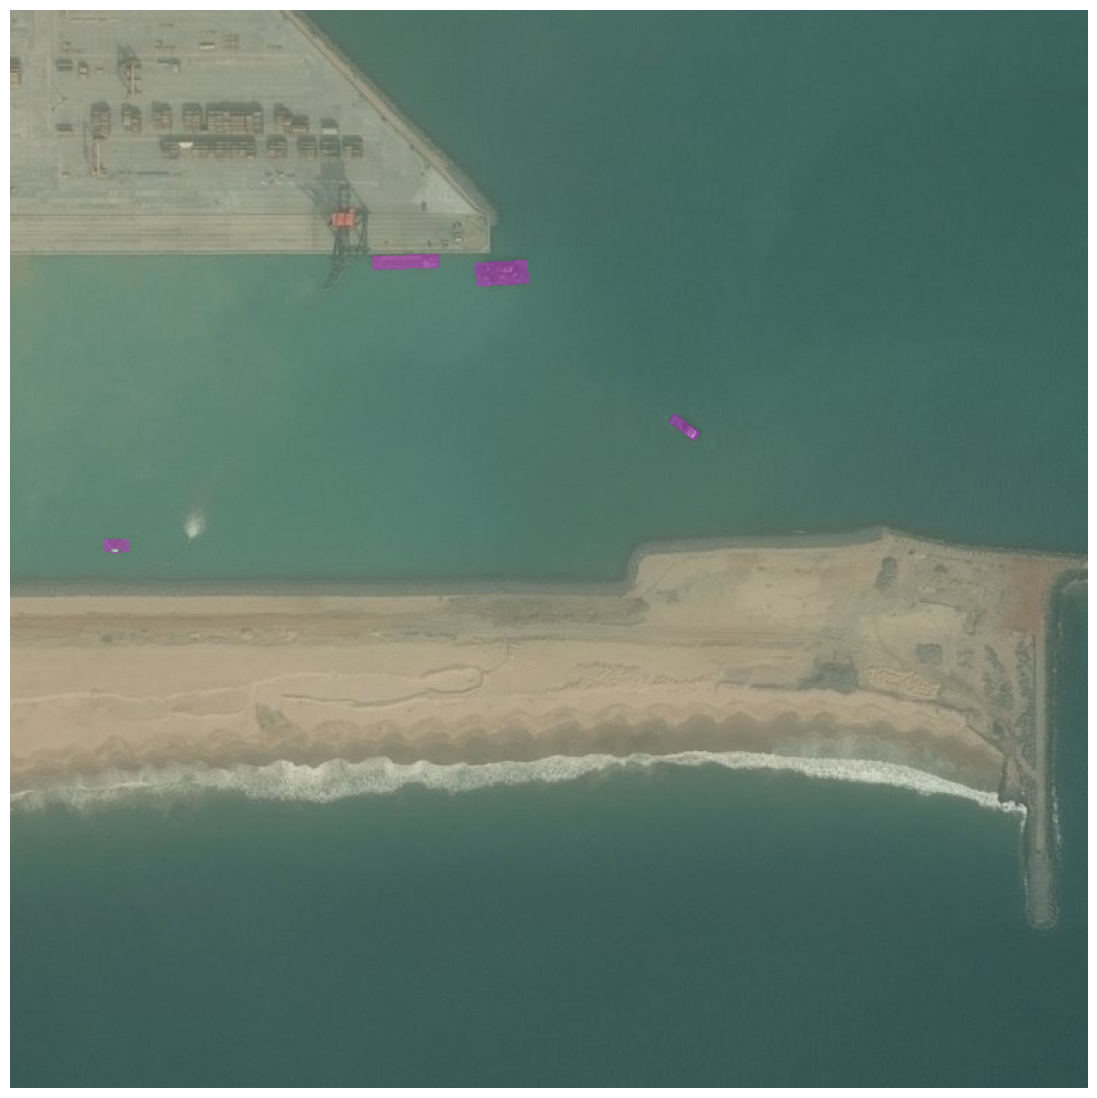

In [3]:
N = 3

plt.figure(figsize=(14, 14))
image, segmentation = dataset[N]
image = image.convert('RGBA')

img_mask = np.zeros((image.height, image.width, 4), dtype=np.int8)
img_mask[segmentation] = np.array([255, 0, 255, 80])

image.alpha_composite(Image.fromarray(img_mask, 'RGBA'))

plt.imshow(image)
plt.axis('off');